In [55]:
# initialize random multi-qubit state
from qiskit import QuantumCircuit, assemble, Aer, transpile
from qiskit.quantum_info import random_statevector, Statevector
from qiskit.tools.visualization import plot_histogram

In [56]:
nq=2
ivec = random_statevector(2**nq) # 2^M dimensional Hilbert space    
print('ivec',ivec)

ivec Statevector([-0.37337305+0.00484307j, -0.66439266-0.34898123j,
             -0.18077766+0.1459521j , -0.05551021+0.49020367j],
            dims=(2, 2))


In [57]:
qc = QuantumCircuit(nq,nq) 
qc.initialize(ivec) #,qubits=nq)
print(qc)

     »
q_0: »
     »
q_1: »
     »
c: 2/»
     »
«     ┌───────────────────────────────────────────────────────────────────────────────────────┐
«q_0: ┤0                                                                                      ├
«     │  Initialize(-0.37337+0.0048431j,-0.66439-0.34898j,-0.18078+0.14595j,-0.05551+0.4902j) │
«q_1: ┤1                                                                                      ├
«     └───────────────────────────────────────────────────────────────────────────────────────┘
«c: 2/═════════════════════════════════════════════════════════════════════════════════════════
«                                                                                              


In [58]:
qc.draw()

»
q_0: »
     »
q_1: »
     »
c: 2/»
     »
«     ┌───────────────────────────────────────────────────────────────────────────────────────┐
«q_0: ┤0                                                                                      ├
«     │  Initialize(-0.37337+0.0048431j,-0.66439-0.34898j,-0.18078+0.14595j,-0.05551+0.4902j) │
«q_1: ┤1                                                                                      ├
«     └───────────────────────────────────────────────────────────────────────────────────────┘
«c: 2/═════════════════════════════════════════════════════════════════════════════════════════
«

{'00': 37, '01': 163}


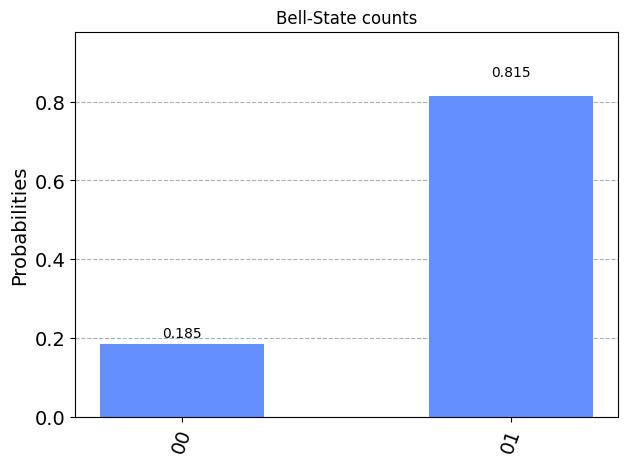

In [60]:
qc.measure([0],[0])

# Transpile for simulator
simulator = Aer.get_backend('aer_simulator')
#qcT = transpile(qc, simulator)

# Run and get counts
result = simulator.run(qc, shots=200).result()
counts = result.get_counts(qc)
print(counts)
plot_histogram(counts, title='Bell-State counts')

In [62]:
def apply_fixed_ansatz(qubits, parameters):

    for iz in range (0, len(qubits)):
        circ.ry(parameters[0][iz], qubits[iz])

    circ.cz(qubits[0], qubits[1])
    circ.cz(qubits[2], qubits[0])

    for iz in range (0, len(qubits)):
        circ.ry(parameters[1][iz], qubits[iz])

    circ.cz(qubits[1], qubits[2])
    circ.cz(qubits[2], qubits[0])

    for iz in range (0, len(qubits)):
        circ.ry(parameters[2][iz], qubits[iz])

circ = QuantumCircuit(3)
apply_fixed_ansatz([0, 1, 2], [[1.1, 1.2, 1.3], [2.1, 2.2, 2.3], [3.1, 3.2, 3.3]])
circ.draw()

┌─────────┐      ┌─────────┐      ┌─────────┐
q_0: ┤ Ry(1.1) ├─■──■─┤ Ry(2.1) ├────■─┤ Ry(3.1) ├
     ├─────────┤ │  │ ├─────────┤    │ ├─────────┤
q_1: ┤ Ry(1.2) ├─■──┼─┤ Ry(2.2) ├─■──┼─┤ Ry(3.2) ├
     ├─────────┤    │ ├─────────┤ │  │ ├─────────┤
q_2: ┤ Ry(1.3) ├────■─┤ Ry(2.3) ├─■──■─┤ Ry(3.3) ├
     └─────────┘      └─────────┘      └─────────┘